## Incremental Model Improvement With Filters And Masks

And now begins the work of the data scientist. We have established a benchmark model. We should now begin to refine upon this model seeking **to continually improve the model's performance** and set new, more accurate benchmarks. We can do this by using exploratory data analysis to **study the features, especially as they relate to the target**. If we find a feature that we believe exhibits some pattern of correspondence to our target, we can use this to refine our model.

#### load the dataset using `read.csv()`

Load the csv file `titanic-updated.csv` into a dataframe called `titanic`.

In [6]:
titanic = read.csv("titanic-updated.csv", header=T, row.names="X")

In [7]:
stopifnot(dim(titanic) == c(891,10))

#### store the number of passengers

Store the number of passengers as the variable `number_of_passengers`.

In [8]:
number_of_passengers <- length(titanic$Survived)
number_of_passengers

[1] 891

In [9]:
### HIDDEN TEST

For this project, we are going to **think of our model as simply the values stored in a vector of predictions**. For example, **we already have one model, a model called `no_survivors`**, which is simply a vector of zeros. **To improve** upon this model we will **use a mask to reduce the number of values we are looking at and then replace these values with a 1**. 

In [10]:
no_survivors <- rep(0, number_of_passengers)

### Randomized Model Improvement

What if we try to improve our model by simply **randomly replacing zeros with one**? We can do this **using the `sample()` function**.

#### create a random mask

In [11]:
random_mask = sample(c(TRUE,FALSE), number_of_passengers, replace = TRUE)
random_mask[1:10]

[1]  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE

#### FREE RESPONSE

Describe what the `sample()` function does.

‘sample’ takes a sample of a specified size from the elements of ‘x’, either with replacement or without replacement. In the example above it randomly chooses TRUE or FALSE and creates a new vector of length `size`. Each time it is run it produces a different vector; that is, it is _random_.

Syntax: `sample(x, size, replace = FALSE, prob = NULL)`
- x: either a vector of one or more elements from which to choose, or a positive integer.
 - The c(TRUE, FALSE) vector in the example above has 2 elements from which to choose
- size: a non-negative integer giving the number of items to choose.
 - number_of_passengers in the example above is 891. `sample` creates a new vector of length 891.
- replace: should sampling be with replacement?
 - In the example above, `replace` is TRUE, allowing T and F to be reused.
 - If `replace` is F, the new vector can at most only be as long as the number of elements in `x` (2 in the example above) because once each element is used once it is no longer available to be assigned to the new vector. Trying to create a longer vector (using a `size` > `x`) produces the following error:
   - "cannot take a sample larger than the population when 'replace = FALSE'"

#### FREE RESPONSE

Describe the vector `random_mask`

`random_mask` is a vector of length 891. Each element is either T or F, randomly assigned by the `sample` function. Each element has a 50% chance of being assigned T and a 50% chance of being assigned F. Every possible combination (or permutation?) of Ts and Fs is possible and is equally likely. Each time `sample` is run it produces a different `random_mask` vector; that is, `random_mask` is randomly generated.

#### duplicate and filter to create random model

Next, we use the vector `random_mask` to create a new model, `random_model`. 

First, we use the `rep` function to duplicate the vector `no_survivors`.

In [12]:
random_model = rep(no_survivors) # vector of 891 zeros
random_model                     # model BEFORE mask is applied

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[889] 0 0 0

Then, we use the vector `random_mask` to assign a value of 1 to `random_model` everywhere `random_mask` is `TRUE`.

In [13]:
random_model[random_mask] = 1 # random_model vector (all zeros) is modified so that some 0s 
                              # are changed to 1s.
                              # The values to keep as 0s and the values to change to 1s
                              # are determined by the `random_mask` vector of random Ts and Fs
                              # Everywhere random_mask is TRUE, assign a 1 to random_model.

random_model                  # model AFTER mask is applied

[1] 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1
 [38] 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1
 [75] 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1
[112] 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1
[149] 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1
[186] 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0
[223] 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1
[260] 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0
[297] 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1
[334] 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
[371] 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0
[408] 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1
[445] 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1
[482] 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1
[519] 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0
[556] 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1
[593] 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0
[630] 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0
[667] 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1
[704] 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1
[741] 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1
[778] 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0
[815] 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1
[852] 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1
[889] 1 0 1

## How accurate is this new model `random_model`?
#### define accuracy metric

Write a function called  `accuracy`. This function should takes two vectors as argument: 

1. a vector of actual values
1. a vector of predicted values 

The function should do two things:

1. it should use `verify_length` to make sure that the vectors have the same length.
1. it computes the accuracy of a prediction vector where accuracy is defined by

$$\text{accuracy} = \sum \left(\text{class}_{actual} = \text{class}_{predicted}\right)$$

In [14]:
verify_length <- function (v1, v2 ){
    if (length(v1) != length(v2)) {
        stop('length of vectors do not match') 
    }
}

accuracy <- function (actual, predicted) {
    verify_length(actual, predicted)
    
    # Compute the accuracy of the `predictor` vector using `sum`
    n = length(actual)
    
    return (sum(actual == predicted) / n)
}

#### assess accuracy of random model

In [15]:
accuracy(titanic$Survived, random_model)

[1] 0.4927048

### ^^^Shouldn't this model perform _worse_ than the all 0s model???
- All 0s is 0.616 accurate
- All 1s should be 0.384 accurate
- So shouldn't a mix of roughly half 1s and half 2s have an accuracy roughly midway between .61 and .38?
- **So why is the result exactly the same as all 0s???

#### Figured it out. I wasn't using `return` to return the result of the fx, and it was somehow returning the 0.6161 value 

As suspected, simply guessing is not better than guessing all zeros. It looks like we might actually justify our exorbitant salaries after all.

In [16]:
# TEST TO SEE **ACCURACY** OF ALL_TRUE_MASK

no_survivors <- rep(0, number_of_passengers)
str (no_survivors)                                # vector: num [1:891] 0 0 0 0 0 0 0 0 0 0 ...
all_1s_model = rep(no_survivors)                  
str(all_1s_model)                                 # vector: num [1:891] 0 0 0 0 0 0 0 0 0 0 ...
                                                  # model BEFORE mask is applied

all_TRUE_mask = sample(c(TRUE), number_of_passengers, replace = TRUE)
str(all_TRUE_mask)                                # vector: logi [1:891] TRUE TRUE TRUE TRUE TRUE TRUE ...
all_1s_model[all_TRUE_mask] = 1
str(all_1s_model)                                 # vector: num [1:891] 1 1 1 1 1 1 1 1 1 1 ...
                                                  # model AFTER mask is applied

accuracy(titanic$Survived, all_1s_model)

 num [1:891] 0 0 0 0 0 0 0 0 0 0 ...
 num [1:891] 0 0 0 0 0 0 0 0 0 0 ...
 logi [1:891] TRUE TRUE TRUE TRUE TRUE TRUE ...
 num [1:891] 1 1 1 1 1 1 1 1 1 1 ...


[1] 0.3838384

^^^ Yes, 
- all 0s is .61 accurate,
- all 1s is .38 accurate, 
- so a 50/50 mix of 0s and 1s should be roughly halfway between those two values, around .50

## Use Proportion Tables To Look At Survival By Feature

Previously, we used a proportion table to look at a **single** feature, `Survived`. Next, we will use a proportion table to **look at how two features interact with each other**. Let's look at the structure of the dataframe again to remind ourselves which features we have available to us.

#### display the structure of the dataframe

In [17]:
str(titanic)

'data.frame':	891 obs. of  10 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket  : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin   : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


First, we look at the proportions of `Pclass` and `Survived`. There are three different ways we can look at a proportion table. 

1. The values of each combination as a proportion of the whole
1. The values in each row as a proportion of that row
1. The values in each column as a proportion of that column

#### whole proportions of `Pclass` versus `Survived`

Here, the entire table sums to 1.

In [18]:
# Usually we think of x,y axes, with x being the predictor and y target. 
# Is Pclass x? Is Survived y?
# If so, in the table x is on the vertical axis and y is the horizontal axis.
# This is backwards of their representation in a Euclidian chart.

prop.table(table(titanic$Pclass, titanic$Survived))

   
             0          1
  1 0.08978676 0.15263749
  2 0.10886644 0.09764310
  3 0.41750842 0.13355780

In [19]:
sum(prop.table(table(titanic$Pclass, titanic$Survived)))

[1] 1

#### proportions of `Pclass` versus `Survived` by row

Here, each row sums to 1.

In [20]:
prop.table(table(titanic$Pclass, titanic$Survived), 1)   # ", 1" means operate on the 1 axis (rows)
                                                         # Can this be thought of as the 1st dimension?
                                                         # So the 1st dim is x, the dim of observations
                                                         # bc w/o observations there is no output???

                                                         # And the 2nd dim is y, output???

   
            0         1
  1 0.3703704 0.6296296
  2 0.5271739 0.4728261
  3 0.7576375 0.2423625

In [21]:
# EXPLORE/EXPERIMENT
# Select the first cell by its row/col index (i,j)
XX = prop.table(table(titanic$Pclass, titanic$Survived), 1)
XX[1][1]
XX[1,1]                                   # both notations work

# Select all rows of the first col by index
XX[,1]
# All cols of first row by index
XX[1,]

# Select the first cell by it row/col NAMES
XX["1"]["0"]                              # Does NOT work
XX["1","0"]                               # THIS WORKS

# Add up values in 2nd row (index 2) 
sum(XX[2,])

# Add up values in row "2" (row.name "2")
sum(XX["2",])

[1] 0.3703704

[1] 0.3703704

1         2         3 
0.3703704 0.5271739 0.7576375

0         1 
0.3703704 0.6296296

[1] NA

[1] 0.3703704

[1] 1

[1] 1

####  proportions of `Pclass` versus `Survived` by column 

Here, each column sums to 1.

In [22]:
prop.table(table(titanic$Pclass, titanic$Survived), 2)    # Of the people who died, 14.6% were in 1st
                                                          # class, 17.7 were 2nd class, and 67.8% were
                                                          # 3rd class.

                                                          # Of the people who lived, 39.8% were 1st
                                                          # class, 25.5 were 2nd class, and 34.8% were
                                                          # 3rd class.

                                                          # The reason 1st and 3rd class values are
                                                          # similar is that there were many more 3rd
                                                          # class pax than 1st class pax.

   
            0         1
  1 0.1457195 0.3976608
  2 0.1766849 0.2543860
  3 0.6775956 0.3479532

#### whole proportions of `Sex` versus `Survived`

Define a variable `whole_prop_table_sex_versus_survived` that is a whole table proportion table of `Sex` versus `Survived.

In [23]:
whole_table_prop_table_sex_versus_survived = prop.table(table(titanic$Sex, titanic$Survived))

In [24]:
whole_table_prop_table_sex_versus_survived
stopifnot(round(as.vector(whole_table_prop_table_sex_versus_survived) ,2) == c(0.09, 0.53, 0.26, 0.12))

        
                  0          1
  female 0.09090909 0.26150393
  male   0.52525253 0.12233446

^^^ IS THIS THE CORRECT WAY TO READ THIS PROPORTION TABLE?
- Each value as a proportion of total pax: 
 - Of the total num of pax, **females who died** accounted for 9%
 - Of the total num of pax, **females who lived** accounted for 26%
 - Of the total num of pax, **males who died** accounted for 53%
 - Of the total num of pax, **males who lived** accounted for 12%

#### proportions of `Sex` versus `Survived` by row

Define a variable `row_prop_table_sex_versus_survived` that is a row proportion table of `Sex` versus `Survived.

In [25]:
row_prop_table_sex_versus_survived = prop.table(table(titanic$Sex, titanic$Survived), 1)

In [26]:
#EXPLORE
row_prop_table_sex_versus_survived
as.vector(row_prop_table_sex_versus_survived)
round(as.vector(row_prop_table_sex_versus_survived))
round(as.vector(row_prop_table_sex_versus_survived) ,2) == c(0.26, 0.81, 0.74, 0.19)

# WHAT IS BEING COMPARED TO WHAT? WHY DOES ABOVE WORK AND BELOW NOT???

round(as.vector(row_prop_table_sex_versus_survived) ,1) == c(0.26, 0.74, 0.81, 0.19)

# Try 
row_prop_table_SURVIVED_versus_SEX = prop.table(table(titanic$Survived, titanic$Sex), 1)
round(as.vector(row_prop_table_SURVIVED_versus_SEX) ,2) == c(0.26, 0.74, 0.81, 0.19)

stopifnot(round(as.vector(row_prop_table_sex_versus_survived) ,2) == c(0.26, 0.81, 0.74, 0.19))

        
                 0         1
  female 0.2579618 0.7420382
  male   0.8110919 0.1889081

[1] 0.2579618 0.8110919 0.7420382 0.1889081

[1] 0 1 1 0

[1] TRUE TRUE TRUE TRUE

[1] FALSE FALSE FALSE FALSE

[1] FALSE FALSE FALSE FALSE

In [27]:
row_prop_table_sex_versus_survived
stopifnot(round(as.vector(row_prop_table_sex_versus_survived) ,2) == c(0.26, 0.81, 0.74, 0.19))

        
                 0         1
  female 0.2579618 0.7420382
  male   0.8110919 0.1889081

^^^ This is defined on the row, so read with reference to the row labels. Read as:
- Of females, 26% died and 74% lived
- Of males, 81% died adn 19% lived

####  proportions of `Sex` versus `Survived` by column 

Define a variable `column_prop_table_sex_versus_survived` that is a column proportion table of `Sex` versus `Survived.

In [28]:
column_prop_table_sex_versus_survived = prop.table(table(titanic$Sex, titanic$Survived), 2)

In [29]:
column_prop_table_sex_versus_survived
stopifnot(round(as.vector(column_prop_table_sex_versus_survived) ,2) == c(0.15, 0.85, 0.68, 0.32))

        
                 0         1
  female 0.1475410 0.6812865
  male   0.8524590 0.3187135

^^^ This is defined on the col, so read with reference to the col labels. Read as:
- Of those who died, 15% were female and 85% were male
- Of those who lived, 68% were female and 32% were male

#### FREE RESPONSE: Analyze Proportion Tables

Using the results obtained above, prepare an analysis of how these two features can be used to predict whether or not someone survived the sinking of the Titanic.

First a rehearsal of the analysis to make sure I understand what it is telling us:

We use a proportion table to look at how two features interact with each other. 

For example, we could look at the proportions of Pclass and Survived. There are three different ways we can look at a proportion table:

1. The values of each combination as a proportion of the **whole**
1. The values in each row as a proportion of that **row**
1. The values in each column as a proportion of that **column**

In each of these the _proportions add up to 1_. That is, each of the values is a percentage of 1, a "portion," or _proportion_ of the whole (or row or col).

#### Pclass and Survived

**Whole**: proportions of Pclass versus Survived.
```
           0          1
  1 0.08978676 0.15263749
  2 0.10886644 0.09764310
  3 0.41750842 0.13355780
```

Note that the entire table above sums to 1:

`sum(prop.table(table(titanic$Pclass, titanic$Survived)))   # 1`

**Row**: proportions of Pclass versus Survived by row
```
            0         1
  1 0.3703704 0.6296296
  2 0.5271739 0.4728261
  3 0.7576375 0.2423625
```

Note that each row sums to 1.

**Column**: proportions of Pclass versus Survived by column
```
            0         1
  1 0.1457195 0.3976608
  2 0.1766849 0.2543860
  3 0.6775956 0.3479532
```

Note that each col sums to 1.

The way to interpret this proportion table is to read it as:

Of the people who died:
- 14.6% were in 1st class, 
- 17.7 were 2nd class, and 
- 67.8% were 3rd class.

Of the people who lived:
- 39.8% were 1st class,
- 25.5 were 2nd class, and 
- 34.8% were 3rd class.

At first it seems odd that the 1st and 3rd class values for those who lived are so similar (both in the 30% range) while the 1st and 3rd class values for those who died are extremely different (15% vs 68%). This is likely bc there were many more 3rd class pax than 1st class pax.

#### Sex and Survived

We can look at another feature pair, Sex and Survived.

**Whole**: whole proportions of Sex versus Survived
```
                  0          1
  female 0.09090909 0.26150393
  male   0.52525253 0.12233446
```

Here, each value is a _proportion of total pax_, so we don't read with reference to the row labels (female or male) or the col labels (died or lived). We must read with reference, or in relation to, the total num of pax and identify each value as a function of BOTH its row label and its col label (e.g., females who died, males who died). Read as: 
 - Of the total num of pax, **females who died** accounted for 9%
 - Of the total num of pax, **females who lived** accounted for 26%
 - Of the total num of pax, **males who died** accounted for 53%
 - Of the total num of pax, **males who lived** accounted for 12%

**Row**: proportions of `Sex` versus `Survived` by row
```
                 0         1
  female 0.2579618 0.7420382
  male   0.8110919 0.1889081
```

This is defined on the row, so read with reference to the row labels. Read _across_ the row as:
- Of females, 26% died and 74% lived
- Of males, 81% died adn 19% lived

**Column**: proportions of `Sex` versus `Survived` by column 
```
                 0         1
  female 0.1475410 0.6812865
  male   0.8524590 0.3187135
```

This is defined on the col, so read with reference to the col labels. Read _down_ the col as:
- Of those who died, 15% were female and 85% were male
- Of those who lived, 68% were female and 32% were male

#### Using these features to predict survival
Since some of the actual values above are greater than the 0.616 that we got from guessing that everyone died, I am guessing that we can use these features to improve our prediction model. Instead of predicting the _everyone_ died, we could try predicting that all _males_ died and all females survived. We should be right 85% of the time for males since 85% of males did die. And we should be right 68% of the time for females since 68% of females did survive. This model should yield a prediction accuracy of somewhere between 68% and 85%, depending on whether there were more female or male pax. (If there were the same number of males and females, I think the expected accuracy would be the mean of 68 and 85.)

Combining features should further improve prediction accuracy. Combining Pclass and Sex should be even more accurate than either alone.

## Targeted Model Improvement

We saw that randomly selecting values to be replaced by 1 did not improve our model. What if we use some more intelligent way to select values that should be replaced by a one in our vector of predictions? 

We just looked at two features and identified some patterns that showed it would be more likely to have survived the sinking of the ship. Based upon this work we might decide that it would be a better model to replace the prediction for all female passengers with a 1. We can do that using masks and filters.

#### create a mask of just women

Create a vector mask, `women_mask` which contains the boolean values associated with whether or not the value of the `Sex` column is the string `'female'`.

In [30]:
women_mask = (titanic$Sex == 'female')
women_mask

[1] FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
 [13] FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE
 [25]  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE
 [37] FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE
 [49] FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE
 [61] FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE
 [85]  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
[109] FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE
[121] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[133]  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE
[145] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
[157]  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE
[169] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
[181]  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE
[193]  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE
[205] FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE
[217]  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE
[241]  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE
[253] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE
[265]  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE
[277]  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[289] FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE
[301]  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
[313]  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE
[325] FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE
[337] FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE
[349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
[361] FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
[373] FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE
[385] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE
[397]  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE
[409] FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE
[421] FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE
[433]  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE
[445] FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[457] FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[469] FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE
[481] FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE
[493] FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE
[505]  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
[517]  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE
[529] FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
[541]  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
[553] FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE
[565]  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE
[577]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE
[589] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE
[601]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE
[613]  TRUE FALSE FALSE 

In [31]:
stopifnot(women_mask[1:10] == c(FALSE, TRUE, TRUE, TRUE, FALSE, FALSE, FALSE, FALSE, TRUE, TRUE))

#### duplicate the vector `no_survivors`

Duplicate the vector `no_survivors` and store as the variable `women_survived`.


In [32]:
women_survived = rep(no_survivors)
str(women_survived)
women_survived

 num [1:891] 0 0 0 0 0 0 0 0 0 0 ...


[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[889] 0 0 0

#### filter to create a model, `women_survived`

Use the vector `women_mask` to assign values of 1 to the vector `women_survived`.

In [33]:
women_survived[women_mask] = 1 # wherever it's TRUE, apply a 1
women_survived

[1] 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0
 [38] 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 [75] 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0
[112] 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1
[149] 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
[186] 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
[223] 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1
[260] 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
[297] 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
[334] 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
[371] 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
[408] 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1
[445] 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
[482] 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0
[519] 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1
[556] 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1
[593] 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0
[630] 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0
[667] 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1
[704] 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0
[741] 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0
[778] 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1
[815] 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
[852] 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1
[889] 1 0 0

#### assess accuracy of  model, `women_survived`

In [34]:
accuracy(titanic$Survived, women_survived)
stopifnot(round(accuracy(titanic$Survived, women_survived), 4) == 0.7868)

[1] 0.7867565

#### FREE RESPONSE: Explaining Creation Of Prediction Vector

Explain in your own words the process by which the prediction vector, `women_survived` was created.

Since we noticed that most women survived, and that this percentage was even higher than the percentage of pax who perished, we deciced to create a model based on all women survive. This involves using masks and filters. 

#### 1) Create a mask of just women

Create a vector mask, `women_mask`, which contains the boolean values associated with whether or not the value of the `Sex` column is the string 'female'.

> women_mask = (titanic\$Sex == 'female')

This creates a vector of bools of length 891 in which every FALSE represents a male and every TRUE represents a female.

(continued in next cell)

#### 2) Duplicate the vector `no_survivors`

Store as the variable `women_survived`.

> women_survived = rep(no_survivors)

This creates a vector of bools of length 891 with 0 (FALSE, did not survive) for every element

#### 3) Filter to create a model called `women_survived`

Use the vector `women_mask` to assign values of 1 to the vector `women_survived`.

> women_survived[women_mask] = 1 

Wherever `women_mask` is TRUE, a 1 is applied to the `women_survived` model

#### 4) Assess the accuracy of the `women_survived` model

> accuracy(titanic$Survived, women_survived)

The model is 78.7% accurate. Not too shabby.

### Can Another Feature Help?

Here, we display a three-way proportion table using `Survived`, `Pclass`, and `Sex`.

In [35]:
prop.table(table(titanic$Survived, titanic$Pclass, titanic$Sex))

, ,  = female

   
              1           2           3
  0 0.003367003 0.006734007 0.080808081
  1 0.102132435 0.078563412 0.080808081

, ,  = male

   
              1           2           3
  0 0.086419753 0.102132435 0.336700337
  1 0.050505051 0.019079686 0.052749719


#### create a mask of just first class

Create a vector mask, `first_class_mask` which contains the boolean values associated with whether or not the value of the `Pclass` column is the string integer 1.

In [36]:
first_class_mask = (titanic$Pclass == 1)
first_class_mask

[1] FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [25] FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE
 [61] FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [85] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
 [97]  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
[121] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
[169]  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE
[193] FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE
[217] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[229] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE
[253]  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE
[265] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE
[277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[289] FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE
[301] FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
[313] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE
[325] FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE
[337]  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[349] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[361] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE
[373] FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE
[385] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE
[397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[409] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
[433] FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
[445] FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE
[457]  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE
[469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
[481] FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE
[493]  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
[505]  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE
[517] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE
[529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE
[541]  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE
[553] FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE
[565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE
[577] FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE
[589] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
[601] FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE
[613] FALSE FALSE FALSE 

#### duplicate the vector `women_survived`

Duplicate the vector `women_survived` and store as the variable `women_and_first_class_survived`.



In [37]:
women_and_first_class_survived = women_survived
women_and_first_class_survived                         # so far the mask is the same as women_survived

[1] 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0
 [38] 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 [75] 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0
[112] 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1
[149] 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
[186] 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
[223] 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1
[260] 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
[297] 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
[334] 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
[371] 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
[408] 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1
[445] 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
[482] 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0
[519] 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1
[556] 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1
[593] 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0
[630] 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0
[667] 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1
[704] 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0
[741] 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0
[778] 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1
[815] 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
[852] 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1
[889] 1 0 0

#### filter to create a model, `women_and_first_class_survived`

Use the vector `first_class_mask` to assign values of 1 to the vector `women_and_first_class_survived` for each person in first class.

In [38]:
women_and_first_class_survived[first_class_mask] = 1
women_and_first_class_survived                         # now the mask has women_survived AND 1st class

[1] 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0
 [38] 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0
 [75] 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1
[112] 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1
[149] 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1
[186] 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0
[223] 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1
[260] 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1
[297] 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1
[334] 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
[371] 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
[408] 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1
[445] 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0
[482] 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0
[519] 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1
[556] 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1
[593] 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0
[630] 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0
[667] 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1
[704] 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0
[741] 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0
[778] 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1
[815] 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0
[852] 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1
[889] 1 1 0

#### assess accuracy of  model, `women_and_first_class_survived`

In [39]:
accuracy(titanic$Survived, women_and_first_class_survived)
stopifnot(round(accuracy(titanic$Survived, women_and_first_class_survived), 4) == 0.7508)

[1] 0.7508418

^^^ Interesting, these 2 features together are LESS accurate that the feature 'female' by itself.

#### Progress Report

Run these three cells to display a progress report of the four models you created. 

In [40]:
scores = c(accuracy(titanic$Survived, no_survivors),
           accuracy(titanic$Survived, random_model),
           accuracy(titanic$Survived, women_survived),
           accuracy(titanic$Survived, women_and_first_class_survived))

In [41]:
library(repr)
options(repr.plot.width=10, repr.plot.height=4)

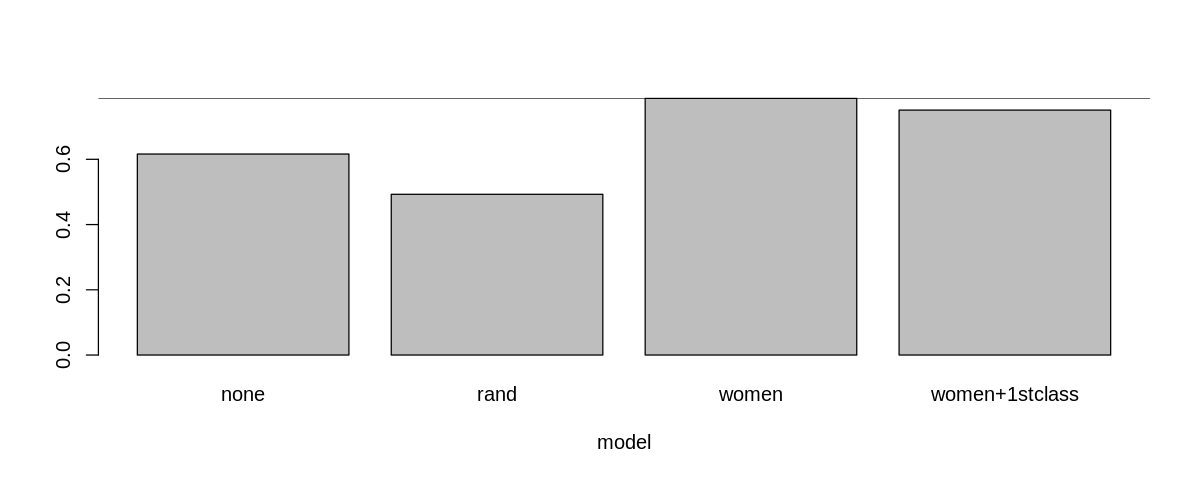

In [42]:
barplot(scores, xlab = 'model', 
        names.arg = c('none','rand','women', 'women+1stclass'))
abline(h = max(scores))

# Gender, age, one or more siblings/parents/spouse/kids

In [43]:
head(titanic)

Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22,1,0,A/5 21171,7.2500,,S
1,1,female,38,1,0,PC 17599,71.2833,C85,C
1,3,female,26,0,0,STON/O2. 3101282,7.9250,,S
1,1,female,35,1,0,113803,53.1000,C123,S
0,3,male,35,0,0,373450,8.0500,,S
0,3,male,NA,0,0,330877,8.4583,,Q


In [44]:
#NEW FEATURE SET
prop.table(table(titanic$Survived, titanic$Age, titanic$Sex, titanic$SibSp, titanic$Parch))

, ,  = female,  = 0,  = 0

   
           0.42        0.67        0.75        0.83        0.92           1
  0 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  1 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
   
              2           3           4           5           6           7
  0 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  1 0.000000000 0.000000000 0.000000000 0.001400560 0.000000000 0.000000000
   
              8           9          10          11          12          13
  0 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  1 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.001400560
   
             14        14.5          15          16          17          18
  0 0.001400560 0.000000000 0.000000000 0.000000000 0.001400560 0.002801120
  1 0.000000000 0.000000000 0.002801120 0.004201681 0.002801120 0.002801120
   
             19          20        20.5  

In [45]:
# for (i in c(TRUE, FALSE)) {
#     for (j in c('&', '|', '&&', '||', 'xor')) {
#         for (k in c(TRUE, FALSE)) {
#             print(c(i,j,k))
#             print(as.logical(i,j,k))                # WRONG RESULTS
#         }
#     }
# }

### x & y    AND
- T & T # TRUE 
- T & F # FALSE
- F & F # FALSE
- F & T # FALSE

### x | y    OR
- T | T # TRUE - 
- T | F # TRUE - 
- F | F # FALSE
- F | T # TRUE - 

### x && y   AND
- T && T # TRUE - 
- T && F # FALSE
- F && F # FALSE
- F && T # FALSE

### x || y   OR
- T || T # TRUE
- T || F # TRUE 
- F || F # FALSE
- F || T # TRUE

### xor (x,y)   ELEMENTWISE EXCLUSIVE OR
Exclusive or (exclusive disjunction): a logical operation that outputs true only when inputs DIFFER (one is true, the other is false).

"A or B, but not, A _and_ B"

More generally, XOR is true only when an odd number of inputs are true. A chain of XORs—a XOR b XOR c XOR d (and so on)—is true whenever an odd number of the inputs are true and "is false whenever an even number of inputs are true.

- xor (TRUE,TRUE)    # FALSE
- xor (TRUE,FALSE)   # TRUE
- xor (FALSE,FALSE)  # FALSE
- xor (FALSE,TRUE)   # TRUE


### isTRUE(x)   
Same as { is.logical(x) && length(x) == 1 && !is.na(x) && x }
- isTRUE(TRUE)  # TRUE - 
- isTRUE(FALSE) # FALSE

### isFALSE(TRUE) and isFALSE(FALSE) 
- Error: could not find function "isFALSE". 
- But it's documented on https://stat.ethz.ch/R-manual/R-devel/library/base/html/Logic.html

### NA 
NA is a valid logical object. Where a component of x or y is NA, the result will be NA if the outcome is ambiguous. In other words NA & TRUE evaluates to NA, but NA & FALSE evaluates to FALSE.

In [46]:
# CREATE MASKS
women_mask = (titanic$Sex == 'female')
child_mask = (titanic$Age < 5) 
# sibsp_mask = (titanic$SibSp > 0)
parch_mask = (titanic$Parch > 0)
fare_mask = (titanic$Fare > 3 * mean(titanic$Fare))

women_mask[is.na(women_mask)] <- FALSE       # Change <NA>s to FALSE
child_mask[is.na(child_mask)] <- FALSE
# sibsp_mask[is.na(sibsp_mask)] <- FALSE
parch_mask[is.na(parch_mask)] <- FALSE
fare_mask[is.na(fare_mask)] <- FALSE

sum(women_mask)
women_mask
# child_mask
# # sibsp_mask
# parch_mask
# fare_mask

[1] 314

[1] FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
 [13] FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE
 [25]  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE
 [37] FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE
 [49] FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE
 [61] FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE
 [85]  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
[109] FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE
[121] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[133]  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE
[145] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
[157]  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE
[169] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
[181]  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE
[193]  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE
[205] FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE
[217]  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE
[241]  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE
[253] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE
[265]  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE
[277]  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[289] FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE
[301]  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
[313]  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE
[325] FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE
[337] FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE
[349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
[361] FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
[373] FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE
[385] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE
[397]  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE
[409] FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE
[421] FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE
[433]  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE
[445] FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[457] FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[469] FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE
[481] FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE
[493] FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE
[505]  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
[517]  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE
[529] FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
[541]  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
[553] FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE
[565]  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE
[577]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE
[589] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE
[601]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE
[613]  TRUE FALSE FALSE 

In [47]:
# COMBINE MASKS
# using each mask in turn ensures that the result will include ANY TRUE values at each element
# Instead, try generating a composite mask where elements are TRUE only if ALL masks are TRUE
# Alternately, make composite maks where each element is TRUE only if 2 or 3 of masks are TRUE

composite_mask_all = (women_mask == parch_mask) #& (parch_mask == fare_mask) & (fare_mask == child_mask)
# composite_mask_all[is.na(composite_mask_all)] <- FALSE   # Change <NA> to FALSE
sum(composite_mask_all)                                  # How many TRUEs?

# composite_mask_all = (composite_mask_all == parch_mask) 
# # composite_mask_all[is.na(composite_mask_all)] <- FALSE
# sum(composite_mask_all)

# composite_mask_all = (composite_mask_all== fare_mask) 

# composite_mask_all = (composite_mask_all== child_mask)
# # composite_mask_all[is.na(composite_mask_all)] <- FALSE
# sum(composite_mask_all)

composite_mask_all

[1] 604

[1]  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE
 [13]  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE
 [25]  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE
 [37]  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE
 [49]  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE
 [61]  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE
 [85] FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [97]  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE
[109]  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE
[121]  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[133] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE
[145]  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE
[157] FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE
[169]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE
[181]  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE
[193] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE
[205]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
[217] FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[229]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
[241] FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE
[253]  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE
[265] FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE
[277] FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[289]  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[301] FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE
[313]  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
[325] FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE
[337]  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE
[349] FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE
[361] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE
[373]  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE
[385]  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE
[397] FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE
[409]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
[421]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE
[433] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE
[445]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
[457]  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[469]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
[481] FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE
[493]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE
[505] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[517] FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
[529]  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE
[541]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE
[553]  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
[565] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE
[577] FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
[589]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE
[601]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[613] FALSE  TRUE  TRUE 

In [48]:
#DUPLICATE
women_and_children_and_sibsp_and_parch_survived = no_survivors # all 0s

In [49]:
# FILTER ON EACH MASK
women_and_children_and_sibsp_and_parch_survived[women_mask] = 1
sum(women_and_children_and_sibsp_and_parch_survived)
women_and_children_and_sibsp_and_parch_survived[child_mask] = 1
sum(women_and_children_and_sibsp_and_parch_survived)
# women_and_children_and_sibsp_and_parch_survived[sibsp_mask] = 1
# sum(women_and_children_and_sibsp_and_parch_survived)
women_and_children_and_sibsp_and_parch_survived[parch_mask] = 1
sum(women_and_children_and_sibsp_and_parch_survived)

women_and_children_and_sibsp_and_parch_survived[fare_mask] = 1
sum(women_and_children_and_sibsp_and_parch_survived)

[1] 314

[1] 337

[1] 407

[1] 414

In [50]:
# ACCURACY
accuracy(titanic$Survived, women_and_children_and_sibsp_and_parch_survived)

[1] 0.7441077

In [51]:
mean(titanic$Fare)

[1] 32.20421